In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
x = [0.9, 2.7, 6.7, 10.9, 6.0, 6.3, 7.0, 8.7, 4.8, 12.5, 
     13.4, 2.0, 3.6, 14.6]
y = [0.5, 1.1, 28.6, 32.8, 15.7, 19, 32.6, 32.3, 7.3, 33.1, 
     32.9, 0.75, 3.6, 33]

In [48]:
val = pd.DataFrame({'x':x, 'y':y})
val = val.sort_values(by='x')
val

,x,y
0,0.9,0.50
11,2.0,0.75
1,2.7,1.10
12,3.6,3.60
8,4.8,7.30
4,6.0,15.70
5,6.3,19.00
2,6.7,28.60
6,7.0,32.60
7,8.7,32.30


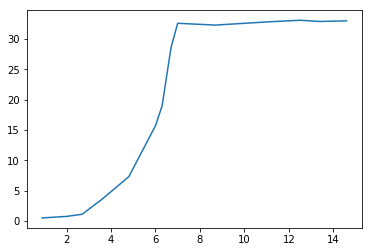

In [49]:
plt.plot(val['x'], val['y'])

In [50]:
val.describe()

,x,y
count,14.000000,14.000000
mean,7.150000,19.517857
std,4.345068,14.167618
min,0.900000,0.500000
25%,3.900000,4.525000
50%,6.500000,23.800000
75%,10.350000,32.750000
max,14.600000,33.100000


## World Development Indicators

In [51]:
import random

In [52]:
data = pd.read_csv('./Week5-Visualization/world-development-indicators/Indicators.csv')

In [53]:
data.head(5)
data.shape

(5656458, 6)

In [54]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [55]:
countries = data['CountryCode'].unique().tolist()
len(countries)

247

In [56]:
countryCodes = data['CountryName'].unique().tolist()
len(countryCodes)
type(data['CountryName'].unique())

numpy.ndarray

In [57]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [58]:
years = data['Year'].unique().tolist()
len(years)

56

In [59]:
print(min(years), max(years))

1960 2015


## Basic Plotting in Matplotlib: Part 1

In [60]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [61]:
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

stage = data[mask1 & mask2]

In [62]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


In [63]:
#dir(pd.Series)

In [64]:
years = stage['Year'].values
co2 = stage['Value'].values

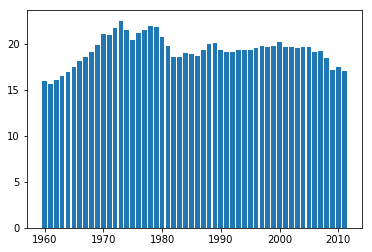

In [65]:
plt.bar(years, co2)
plt.show()

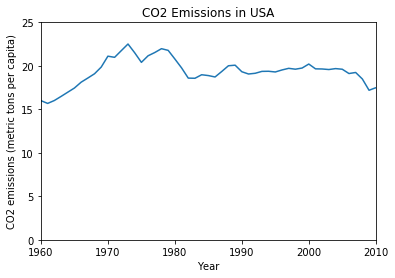

In [66]:
plt.plot(years, co2)
plt.xlabel('Year')
plt.ylabel(stage.IndicatorName.iloc[0])
plt.title('CO2 Emissions in USA')
plt.axis([1960,2010,0,25])
plt.show()

In [67]:
stage.IndicatorName.iloc[0]

'CO2 emissions (metric tons per capita)'

In [68]:
help(pd.DataFrame.loc)

Help on property:

    Access a group of rows and columns by label(s) or a boolean array.
    
    ``.loc[]`` is primarily label based, but may also be used with a
    boolean array.
    
    Allowed inputs are:
    
    - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
      interpreted as a *label* of the index, and **never** as an
      integer position along the index).
    - A list or array of labels, e.g. ``['a', 'b', 'c']``.
    - A slice object with labels, e.g. ``'a':'f'``.
    
      .. warning:: Note that contrary to usual python slices, **both** the
          start and the stop are included
    
    - A boolean array of the same length as the axis being sliced,
      e.g. ``[True, False, True]``.
    - A ``callable`` function with one argument (the calling Series, DataFrame
      or Panel) and that returns valid output for indexing (one of the above)
    
    See more at :ref:`Selection by Label <indexing.label>`
    
    Raises
    ------
    KeyError:
        w

In [69]:
hist_data = stage['Value'].values
print(len(hist_data))

52


/Users/r38411/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


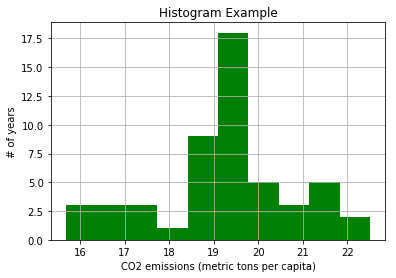

In [70]:
plt.hist(hist_data, 10, normed=False, facecolor='green')
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of years')
plt.title('Histogram Example')
plt.grid(True)
plt.show()

In [71]:
#help(pd.Series.isin)

In [72]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

co2_2011 = data[mask1 & mask2]
co2_2011.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131


In [73]:
m1 = co2_2011[['CountryCode','Value']].sort_values(by=['Value'])
m1.head(3)

,CountryCode,Value
5069955,BDI,0.021350
5075305,TCD,0.043830
5079628,ZAR,0.050303


In [74]:
#help(pd.DataFrame.sort_values)
mm = co2_2011.sort_values(by=['Value'])
mm = mm.reset_index()
usa_loc = mm.loc[mm.CountryCode=='USA']
#usa_loc = mm.loc[mm.CountryCode=='USA'].reset_index().index
usa_loc

,index,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
221,5194727,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,17.020216


In [75]:
len(mm)

232

In [76]:
len(data)

5656458

/Users/r38411/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([136.,  57.,  22.,   7.,   5.,   2.,   1.,   0.,   1.,   1.]),
 array([2.13499261e-02, 4.42110757e+00, 8.82086521e+00, 1.32206229e+01,
        1.76203805e+01, 2.20201381e+01, 2.64198958e+01, 3.08196534e+01,
        3.52194111e+01, 3.96191687e+01, 4.40189264e+01]),
 <a list of 10 Patch objects>)

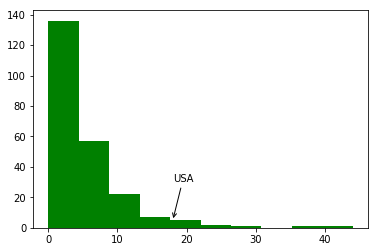

In [77]:
fig, ax = plt.subplots()
ax.annotate("USA",
           xy=(18,5), xycoords='data',
           xytext=(18,30), textcoords='data',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3"),
           )
plt.hist(co2_2011['Value'],10,normed=False, facecolor='green')

In [78]:
#help(plt.subplots)

In [79]:
help(ax.annotate)

Help on method annotate in module matplotlib.axes._axes:

annotate(s, xy, *args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Annotate the point *xy* with text *s*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    s : str
        The text of the annotation.
    
    xy : (float, float)
        The point *(x,y)* to annotate.
    
    xytext : (float, float), optional
        The position *(x,y)* to place the text at.
        If *None*, defaults to *xy*.
    
    xycoords : str, `.Artist`, `.Transform`, callable or tuple, optional
    
        The coordinate system that *xy* is given in. The following types
        of values are supported:
    
        - One of the following strings:
    
          =================   ==========

## Basic 2

In [80]:
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

gdp_stage = data[mask1 & mask2]

In [81]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


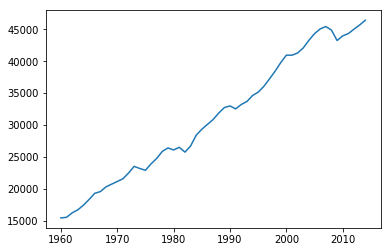

In [82]:
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

In [83]:
print("GDP min year = ", gdp_stage['Year'].min(), 'max: ', 
      gdp_stage['Year'].max())

GDP min year =  1960 max:  2014


In [84]:
gdp_stage_trunc = gdp_stage[gdp_stage.Year < 2012]
print(len(gdp_stage_trunc))

52


In [85]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
        because th

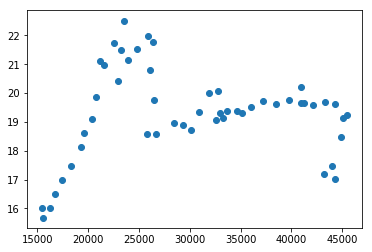

In [86]:
plt.scatter(gdp_stage_trunc['Value'].values, stage['Value'].values)

In [87]:
np.corrcoef(gdp_stage_trunc['Value'], stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

In [88]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [89]:
n1 =data[data.IndicatorName.str.contains("GDP per capita")].IndicatorName.unique()
n1

array(['GDP per capita (current US$)',
       'GDP per capita (constant 2005 US$)',
       'GDP per capita (current LCU)', 'GDP per capita (constant LCU)',
       'GDP per capita growth (annual %)',
       'Government expenditure per secondary student as % of GDP per capita (%)',
       'Government expenditure per primary student as % of GDP per capita (%)',
       'Government expenditure per tertiary student as % of GDP per capita (%)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)'], dtype=object)

In [90]:
len(n1)

10

## Folium

In [91]:
import folium

In [92]:
country_geo = 'Week5-Visualization/geo/world-countries.json'

In [93]:
data = pd.read_csv('./Week5-Visualization/world-development-indicators/Indicators.csv')

In [94]:
data.shape

(5656458, 6)

In [95]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

stage = data[mask1 & mask2]
stage.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131


In [96]:
plot_data = stage[['CountryCode','Value']]
plot_data.head(3)

,CountryCode,Value
5026275,ARB,4.724500
5026788,CSS,9.692960
5027295,CEB,6.911131


In [97]:
hist_indicator = stage.IndicatorName.iloc[0]
hist_indicator

'CO2 emissions (metric tons per capita)'

In [98]:
map = folium.Map(location=[100,0], zoom_start=1.5)

In [99]:
map.choropleth(geo_data=country_geo, data=plot_data,
              columns=['CountryCode','Value'],
              key_on = 'feature.id',
              fill_color='YlGnBu', fill_capacity=0.7, line_oapacity=0.2,
              legend_name=hist_indicator)

/Users/r38411/anaconda2/envs/py35/lib/python3.5/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [100]:
map.save('plot_data.html')

In [101]:
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=900 height=700></iframe>')

In [102]:
hist_indicator = 'GDP per capita \(current US'
hist_year = 2014

mask1 = data.IndicatorName.str.contains(hist_indicator)
mask2 = data.Year.isin([hist_year])

data1 = data[mask1 & mask2]
data1.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534379,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,7386.428444
5534630,Caribbean small states,CSS,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,10164.320958
5534889,Central Europe and the Baltics,CEB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,14086.521810


In [103]:
#data[data.IndicatorName.str.contains('GDP per capita')].IndicatorName.unique()
plot_data = data1[['CountryCode', 'Value']]
plot_data.head(3)

,CountryCode,Value
5534379,ARB,7386.428444
5534630,CSS,10164.320958
5534889,CEB,14086.521810


In [104]:
map = folium.Map(location=[100,0], zoom_start=1.5)

In [105]:
map.choropleth(geo_data=country_geo, data=plot_data,
              columns=['CountryCode','Value'],
              key_on = 'feature.id',
              fill_color='YlGnBu', fill_capacity=0.7, line_oapacity=0.2,
              legend_name=hist_indicator)

/Users/r38411/anaconda2/envs/py35/lib/python3.5/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [106]:
map.save('plot_data.html')

In [107]:
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=900 height=700></iframe>')

In [108]:
print(plot_data.Value.max())
print(plot_data.Value.idxmax())
data.iloc[plot_data.Value.idxmax(),:]

116664.26248752301
5597012


CountryName                        Luxembourg
CountryCode                               LUX
IndicatorName    GDP per capita (current US$)
IndicatorCode                  NY.GDP.PCAP.CD
Year                                     2014
Value                                  116664
Name: 5597012, dtype: object

In [109]:
plot_data.sort_values(by='Value')

,CountryCode,Value
5599014,MWI,255.044570
5560069,BDI,286.002336
5562854,CAF,358.537836
5609956,NER,427.373240
5566215,ZAR,442.339539
5598449,MDG,449.400830
5595758,LBR,457.858587
5581375,GIN,539.615775
5623991,SOM,542.615884
5581902,GNB,567.822610


In [111]:
us_geo = 'Week5-Visualization/geo/us-states.json'
data = pd.read_csv('./Week5-Visualization/us_county_data.csv')
data.head(3)

,FIPS_Code,State,Area_name,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Median_Household_Income_2011,Med_HH_Income_Percent_of_StateTotal_2011
0,0,US,United States,154505871,140674478,13831393,9,50502,100
1,1000,AL,Alabama,2190519,1993977,196542,9,41427,100
2,1001,AL,Autauga County,25930,23854,2076,8,48863,117.9


In [118]:
print(len(data))
mask1 = data.Area_name.str.contains('County')
stage1 = data[mask1]
stage1.head(5)

3276


,FIPS_Code,State,Area_name,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Median_Household_Income_2011,Med_HH_Income_Percent_of_StateTotal_2011
2,1001,AL,Autauga County,25930,23854,2076,8,48863,117.9
3,1003,AL,Baldwin County,85407,78491,6916,8.1,50144,121
4,1005,AL,Barbour County,9761,8651,1110,11.4,30117,72.7
5,1007,AL,Bibb County,9216,8303,913,9.9,37347,90.2
6,1009,AL,Blount County,26347,24156,2191,8.3,41940,101.2


In [149]:
#help(data.Area_name.str)
plot_data = stage1[['State','Median_Household_Income_2011']].groupby('State', as_index=False).count()
plot_data.head(3)

,State,Median_Household_Income_2011
0,AL,67
1,AR,75
2,AZ,15


In [127]:
#help(stage1.groupby(by='State').Median_Household_Income_2011.agg)

In [157]:
def do_map(g_data, p_data, code, val):
    map = folium.Map(location=[100,0], zoom_start=1.5)
    map.choropleth(geo_data=g_data, data=p_data,
              columns=[code, val],
              key_on = 'feature.id',
              fill_color='YlGnBu', fill_capacity=0.7, line_oapacity=0.2,
              legend_name=hist_indicator)
    map.save('plot_data.html')
    HTML('<iframe src=plot_data.html width=900 height=700></iframe>')

In [158]:
do_map(us_geo, plot_data, 'State', 'Median_Household_Income_2011')

/Users/r38411/anaconda2/envs/py35/lib/python3.5/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [159]:
HTML('<iframe src=plot_data.html width=900 height=700></iframe>')